In [1]:
import numpy as np
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score, f1_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold

from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [2]:
def custom_scorer(y_true, y_pred, actual_scorer):
    score = np.nan

    try:
        score = actual_scorer(y_true, y_pred)
    except Exception: 
        pass

    return score

acc = make_scorer(custom_scorer, actual_scorer = accuracy_score)
auc_score = make_scorer(custom_scorer, actual_scorer = roc_auc_score, 
                        needs_threshold=True) # <== Added this to get correct roc

X, y = load_iris().data, load_iris().target

cvv = KFold(3)
params={'criterion':['gini', 'entropy']}
gc = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv =cvv, 
                  scoring={"roc_auc": auc_score, "accuracy": acc}, 
                  refit="roc_auc", n_jobs=-1, 
                  return_train_score = True)
gc.fit(X, y)
# print(gc.cv_results_)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan]
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy']}, refit='roc_auc',
             return_train_score=True,
             scoring={'accuracy': make_scorer(custom_scorer, actual_scorer=<function accuracy_score at 0x000001B15E3140D0>),
                      'roc_auc': make_scorer(custom_scorer, needs_threshold=True, actual_scorer=<function roc_auc_score at 0x000001B15E2F3EE0>)})

In [3]:
def custom_scorer(y_true, y_pred, actual_scorer):
    score = np.nan

    try:
        score = actual_scorer(y_true, y_pred)
    except Exception: 
        pass

    return score

acc = make_scorer(custom_scorer, actual_scorer = accuracy_score)
auc_score = make_scorer(custom_scorer, actual_scorer = roc_auc_score, 
                        needs_threshold=True) # <== Added this to get correct roc
f1_score = make_scorer(custom_scorer, actual_scorer = f1_score)
X, y = load_iris().data, load_iris().target

cvv = KFold(3)
params={'criterion':['gini', 'entropy']}
gc = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv =cvv, 
                  scoring={"f1_score": f1_score, }, 
                  refit="f1_score", n_jobs=-1, 
                  return_train_score = True)
gc.fit(X, y)
# print(gc.cv_results_)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan]
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the train scores are non-finite: [nan nan]
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy']}, refit='f1_score',
             return_train_score=True,
             scoring={'f1_score': make_scorer(custom_scorer, actual_scorer=<function f1_score at 0x000001B15E3144C0>)})

Text(0.5, 1.0, 'Label 8')

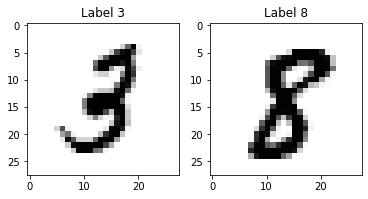

In [4]:

 
# Load the MNIST data
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
 
# Randomly select 1000 samples for performance reasons
np.random.seed(100)
subsample_idc = np.random.choice(X.shape[0], 1000, replace=False)
X = X[subsample_idc,:]
y = y[subsample_idc]
 
# Show two example images
fig, ax = plt.subplots(1,2)
ax[0].imshow(X[11,:].reshape(28,28), 'Greys')
ax[1].imshow(X[15,:].reshape(28,28), 'Greys')
ax[0].set_title("Label 3")
ax[1].set_title("Label 8")

In [7]:
X.shape
# (1000, 784)
# 1000 Samples with 784 features
y.shape
# (1000,)
# 1000 labels
# np.unique(y)
# array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)
# The 10 classes of the images

(1000,)

In [14]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns

In [15]:
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(X)
tsne_result.shape

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1000, 2)

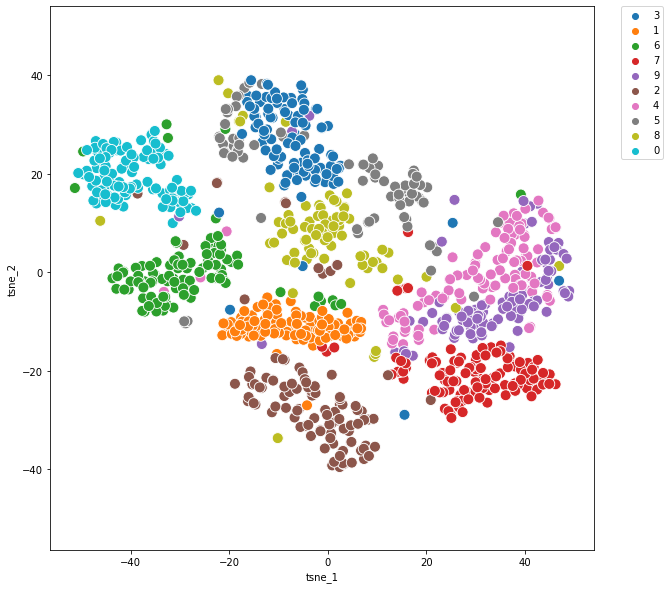

In [23]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
fig, ax = plt.subplots(1, figsize =(10,10))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)

lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)


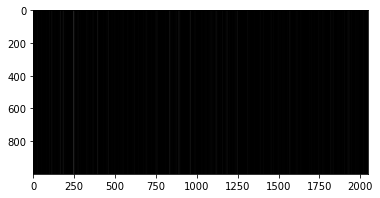

In [27]:
import numpy as np
from matplotlib import pyplot as plt


path = r'C:\Users\DELL\Google Drive\upwork\projects\mo_jack\svm2\Saved_Embeddings\Normal\1802030079.jpg.npy' 
img_array = np.load(path)


new_arr = []
for i in range(1000):
    new_arr.append(img_array)
new_arr= np.array(new_arr)

plt.imshow(new_arr, cmap='gray')
plt.show()


In [29]:
from PIL import Image

im = Image.fromarray(new_arr)
# this might fail if `img_array` contains a data type that is not supported by PIL,
# in which case you could try casting it to a different dtype e.g.:
# im = Image.fromarray(img_array.astype(np.uint8))

im.show()

In [10]:
plt.imshow?

[array([0.        , 0.00648576, 0.        , ..., 0.        , 0.        ,
        0.        ], dtype=float32),
 array([0.        , 0.00648576, 0.        , ..., 0.        , 0.        ,
        0.        ], dtype=float32),
 array([0.        , 0.00648576, 0.        , ..., 0.        , 0.        ,
        0.        ], dtype=float32),
 array([0.        , 0.00648576, 0.        , ..., 0.        , 0.        ,
        0.        ], dtype=float32),
 array([0.        , 0.00648576, 0.        , ..., 0.        , 0.        ,
        0.        ], dtype=float32),
 array([0.        , 0.00648576, 0.        , ..., 0.        , 0.        ,
        0.        ], dtype=float32),
 array([0.        , 0.00648576, 0.        , ..., 0.        , 0.        ,
        0.        ], dtype=float32),
 array([0.        , 0.00648576, 0.        , ..., 0.        , 0.        ,
        0.        ], dtype=float32),
 array([0.        , 0.00648576, 0.        , ..., 0.        , 0.        ,
        0.        ], dtype=float32),
 array([0.

In [19]:
img_array

array([0.        , 0.00648576, 0.        , ..., 0.        , 0.        ,
       0.        ], dtype=float32)